# Movies Dataset

Dataset source: https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney  

In [1]:
# first we import the libraries
import utils
import plot_utils
import importlib
import os  # for path

In [2]:
importlib.reload(utils)  # reload utils to get the updated version
importlib.reload(plot_utils)  # reload utils to get the updated version
movies_fname = os.path.join("input_data", "movies.csv")
movies = utils.open_file_to_mypytable(movies_fname)
movies.remove_rows_with_missing_values()
movies.convert_to_numeric()

## EDA:

#####  1. (5 pts) How many movies does each streaming service (Netflix, Hulu, Prime, Disney+) host? Who hosts the most movies? 

In [3]:
netflix_amount = utils.get_count_of_attribute(movies, "Netflix")
hulu_amount = utils.get_count_of_attribute(movies, "Hulu")
prime_amount = utils.get_count_of_attribute(movies, "Prime Video")
disney_amount = utils.get_count_of_attribute(movies, "Disney+")

print("Netflix:", netflix_amount)
print("Hulu:", hulu_amount)
print("Prime Video:", prime_amount)
print("Disney+:", disney_amount)

print(
    "The service that hosts the most movies has:",
    max(netflix_amount, hulu_amount, prime_amount, disney_amount),
)

Netflix: 3560
Hulu: 903
Prime Video: 12354
Disney+: 564
The service that hosts the most movies has: 12354


##### 2. (5 pts) Of the total occurrences of hosted movies (note a movie can be hosted on multiple services), what percent does each streaming service host?

In [4]:
total = netflix_amount + hulu_amount + prime_amount + disney_amount
max_percentage = (
    max(netflix_amount, hulu_amount, prime_amount, disney_amount) / total * 100
)
max_percentage = round(max_percentage, 2)  # round so its easier
print("The service that hosts the most movies has:", max_percentage, "% of the total")

The service that hosts the most movies has: 71.08 % of the total


### Before the next two parts, we need to get/clean the rotten tomatoes data and the imdb data into new lists.

In [5]:
imdb = movies.get_column("IMDb")
rotten_tomatoes = movies.get_column("Rotten Tomatoes")

rotten_tomatoes_int = []
for rating in rotten_tomatoes:
    rotten_tomatoes_int.append(utils.convert_percentage_to_decimal(rating))

imdb_int = []
for rating in imdb:
    try:
        imdb_int.append(int(float(rating) * 10))
    except:
        imdb_int.append("NA")  # add the average rating

# now we are gonna go through the imdb_int list and remove and indexes where the value is NA
new_imdb_int = []
new_rotten_tomatoes_int = []
for i in range(len(imdb_int)):
    try:
        temp1 = int(imdb_int[i])
        temp2 = int(rotten_tomatoes_int[i])
        new_imdb_int.append(temp1)
        new_rotten_tomatoes_int.append(temp2)
    except:
        pass

imdb = new_imdb_int
rotten_tomatoes = new_rotten_tomatoes_int

##### 3. (10 pts) How does the distribution of IMDb ratings compare to the distribution of Rotten Tomatoes scores?

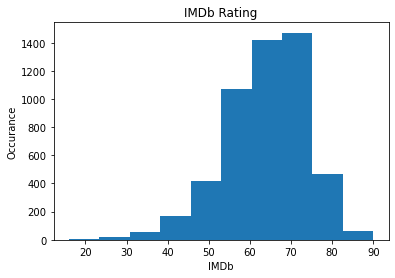

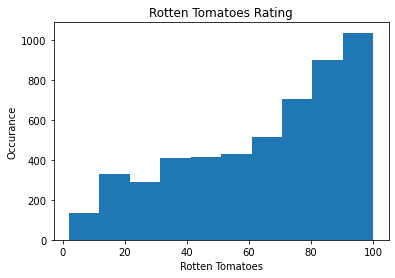

In [6]:
# We can use a histogram to visualize the distribution of the IMDb and Rotten Tomatoes ratings
# We can use the same function as before
plot_utils.plot_histogram(imdb, "IMDb", "IMDb Rating")
plot_utils.plot_histogram(rotten_tomatoes, "Rotten Tomatoes", "Rotten Tomatoes Rating")

* We can see that Rotten Tomatoes seems to have a more variable distribution of scores, but IMDb has a more consistent distribution.
* Rotten Tomatoes also has a higher average score, but IMDb has a lower average score.

##### 4. (10 pts) Are IMDb ratings and Rotten Tomatoes scores in agreement? Meaning if one rates a movie low (or high), is it likely the other one did as well? What is the strength of this relationship?

In [7]:
correlation = utils.get_correlation(rotten_tomatoes, imdb)
print("The correlation between IMDb and Rotten Tomatoes is:", correlation)

The correlation between IMDb and Rotten Tomatoes is: 0.23213110612428978


## Part 2

1. How do the distributions of IMDb ratings *for each genre* compare to the distributions of Rotten Tomatoes scores *for each genre*? Is there a particular genre that IMDb and/or Rotten Tomatoes seems to rate consistently high (or low)? To answer this, make a chart (separately for IMDb and Rotten Tomatoes) with genre on the x-axis and rating on the y-axis. Each genre should have a vertical box and whisker showing the distribution of ratings for that genre.
* Note: This is challenging for a few reasons, one of which is how the genre is stored for each movie. Since a movie can have more than one genre, you should appropriately use a movie's rating in the distributions for all of its genres. Happy coding!!

In [8]:
# make a chart with genre on the x-axis and rating on the y-axis
importlib.reload(utils)  # reload utils to get the updated version
importlib.reload(plot_utils)  # reload utils to get the updated version

genres = movies.get_column("Genres")
# remove all empty values or NA
while genres.count("") != 0:
    genres.remove("")

genre_dict = {}
for genre in genres:
    for word in genre.split(","):
        word = word.strip()
        if word not in genre_dict:
            genre_dict[word] = []
        genre_dict[word].append(imdb[-1])

In [9]:
# make a chart that has the frequency of each genre
genre_count = {}
for genre in genre_dict:
    genre_count[genre] = len(genre_dict[genre])

In [10]:
importlib.reload(utils)  # reload utils to get the updated version
importlib.reload(plot_utils)  # reload utils to get the updated version

print(genre_count)

{'Action': 2683, 'Adventure': 1778, 'Sci-Fi': 1228, 'Thriller': 3354, 'Comedy': 4637, 'Western': 499, 'Animation': 711, 'Family': 1514, 'Biography': 821, 'Drama': 7227, 'Music': 667, 'War': 539, 'Crime': 1833, 'Fantasy': 1089, 'Romance': 2359, 'History': 715, 'Mystery': 1274, 'Horror': 2201, 'Sport': 404, 'Documentary': 2546, 'Musical': 401, 'News': 105, 'Short': 386, 'Reality-TV': 22, 'Talk-Show': 19, 'Game-Show': 7, 'Film-Noir': 79}


In [11]:
# now we can go through movies and add up the ratings for each genre
# make a parallel dictionary that has the average rating for each genre
genre_average = {}
for genre in genre_count:
    sum = 0
    for movie in movies.data:
        if genre in movie[-4]:  # the index of genres is -4
            try:
                sum += movie[5]  # the index of imdb is
            except:
                pass
    genre_average[genre] = sum / genre_count[genre]

genre_total = {}
for genre in genre_count:
    genre_movies = []
    for movie in movies.data:
        if genre in movie[-4]:  # the index of genres is -4
            try:
                genre_movies.append(float(movie[5]))  # the index of imdb is
            except:
                pass
    genre_total[genre] = genre_movies

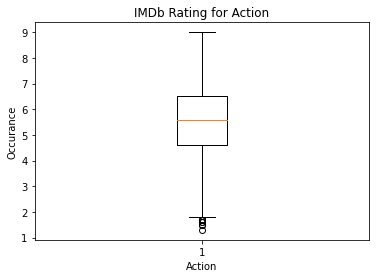

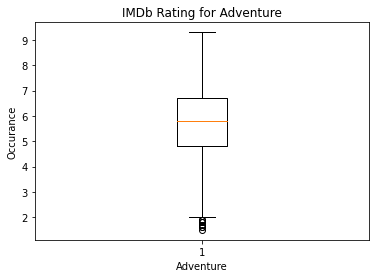

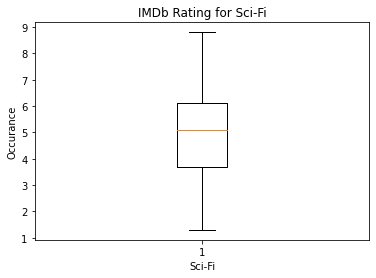

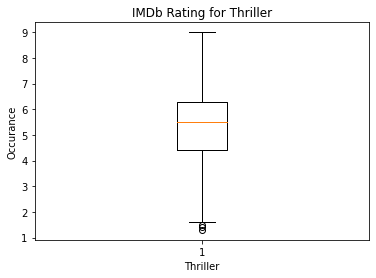

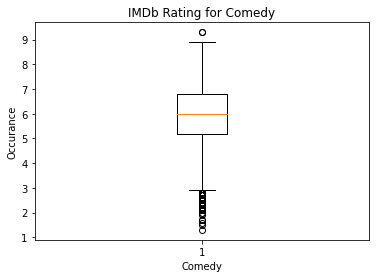

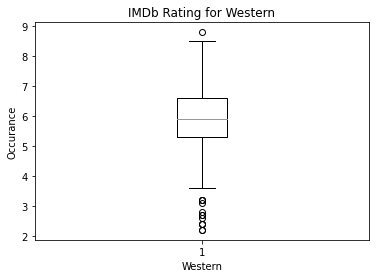

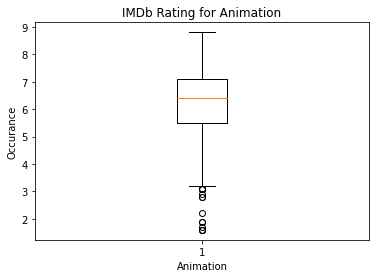

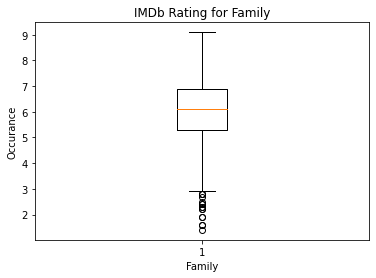

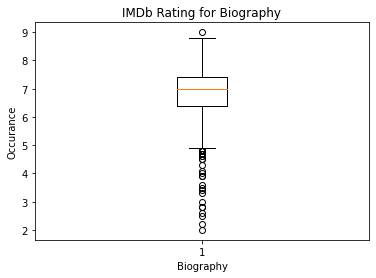

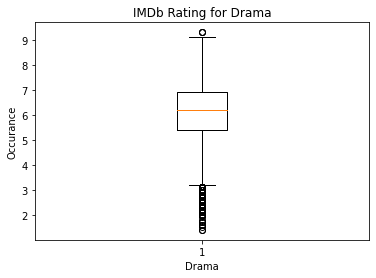

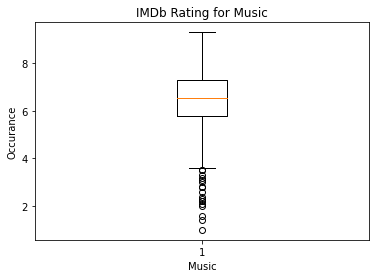

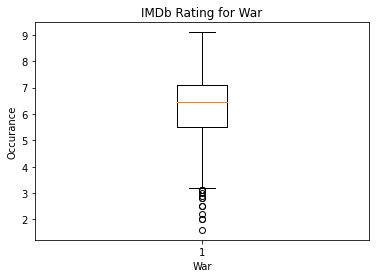

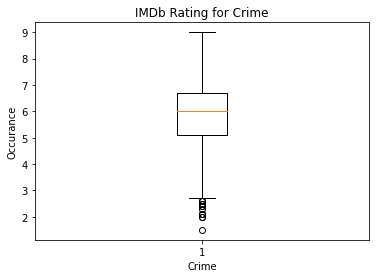

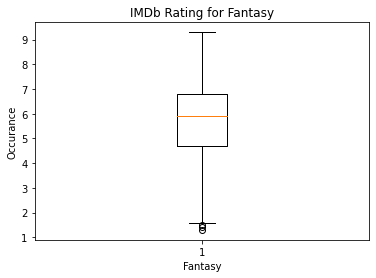

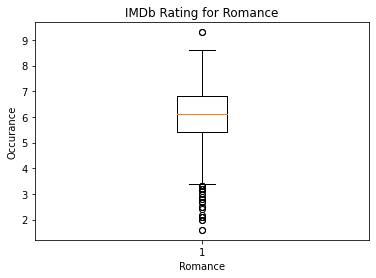

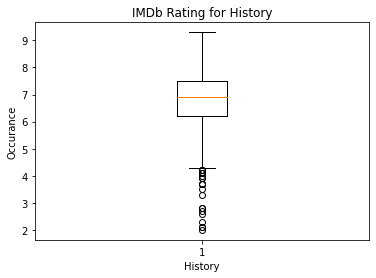

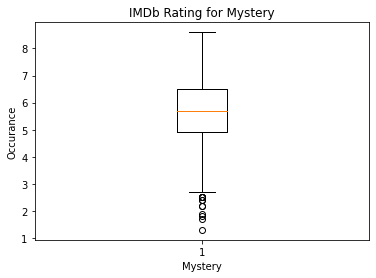

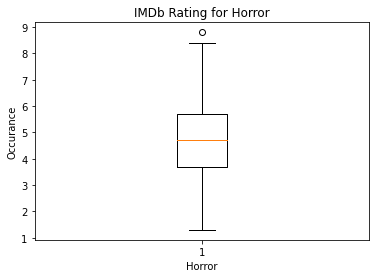

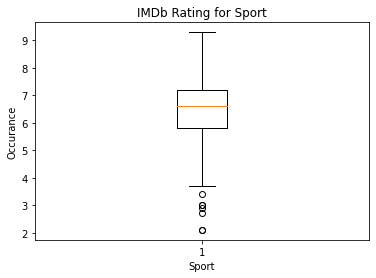

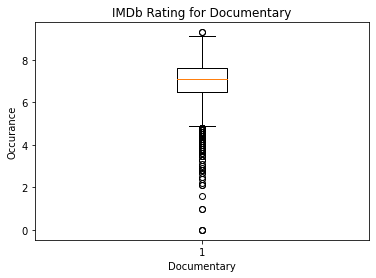

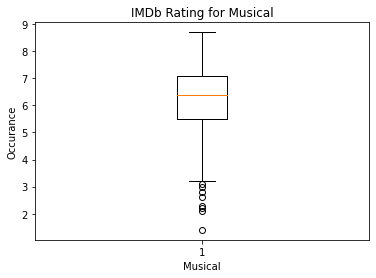

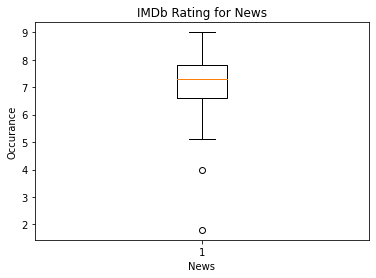

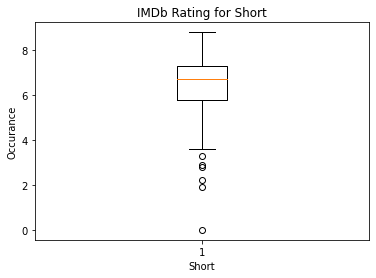

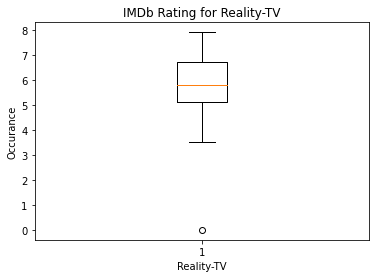

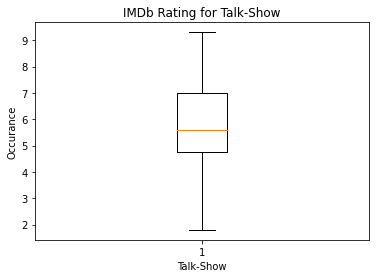

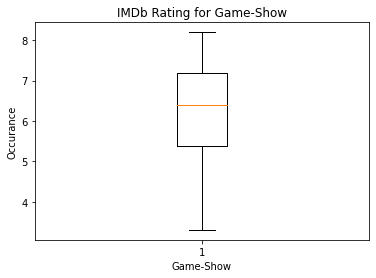

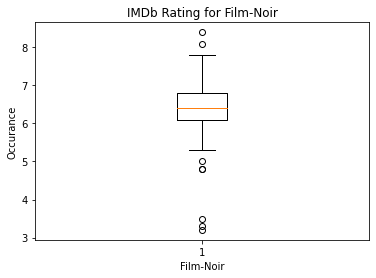

In [12]:
# TODO: DO THIS
importlib.reload(utils)  # reload utils to get the updated version
importlib.reload(plot_utils)  # reload utils to get the updated version

for genre in genre_average:
    plot_utils.plot_box_and_whisker(
        genre_total[genre], genre, ("IMDb Rating for " + genre)
    )

#### Conclusion:
* It appears that the highest rated genre on IMDb is either Music or Biography